### Imports

In [1]:
import tensorflow
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set()

### Dataset

In [2]:
dataset = keras.datasets.fashion_mnist
((imagens_treino, identificacoes_treino),(imagens_teste, identificacoes_teste)) = dataset.load_data()

4423680/4422102 [==============================] - 0s 0us/step


### Pequena Exploração

In [3]:
print('Número de imagens e tamanhos')
imagens_treino.shape, imagens_teste.shape, imagens_teste.shape, identificacoes_teste.shape

Número de imagens e tamanhos


((60000, 28, 28), (10000, 28, 28), (10000, 28, 28), (10000,))

### Exibição

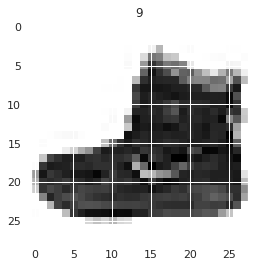

In [4]:
plt.title(identificacoes_treino[0])
plt.imshow(imagens_treino[0], cmap='binary')

In [5]:
print(identificacoes_treino.min(), identificacoes_treino.max())

0 9


In [6]:
# nomes das classificações retiradas do github original do dataset
nomes_classificacoes = ['camiseta','calca', 'pullover','vestido', 
                        'casaco','sandalia','camisa','tenis','bolsa','bota']

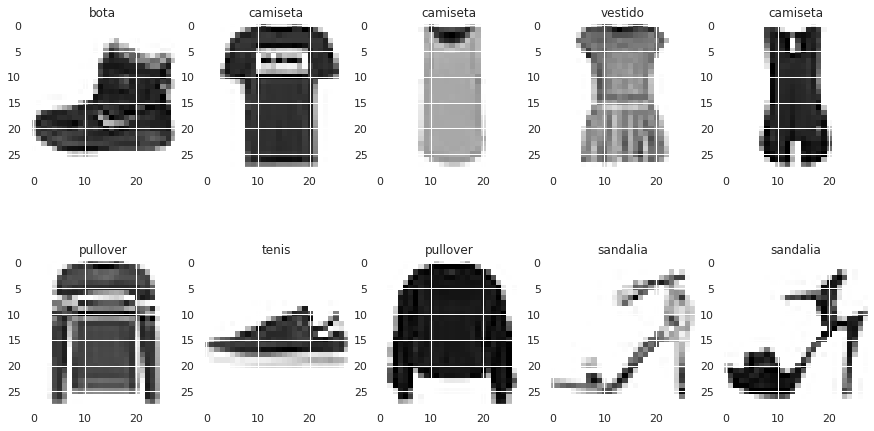

In [7]:
plt.figure(figsize=(15,8))
for imagem in range(10):
    plt.subplot(2,5,imagem+1)
    plt.title(nomes_classificacoes[identificacoes_treino[imagem]])
    plt.imshow(imagens_treino[imagem], cmap='binary')

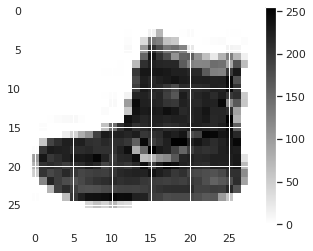

In [8]:
plt.imshow(imagens_treino[0], cmap='binary')
plt.colorbar()

In [9]:
imagens_treino = imagens_treino/255. #normalização

### Criação do modelo

In [10]:
modelo = keras.Sequential([
    keras.layers.Flatten(input_shape = (28,28)),
    keras.layers.Dense(256, activation=tensorflow.nn.relu),
    keras.layers.Dropout(0.2), 
    keras.layers.Dense(10, activation=tensorflow.nn.softmax)
])

In [11]:
modelo_sem_camada_dropout = keras.Sequential([
    keras.layers.Flatten(input_shape = (28,28)),
    keras.layers.Dense(256, activation=tensorflow.nn.relu),
    keras.layers.Dense(10, activation=tensorflow.nn.softmax)
])

A adição da camada Dropout na rede ajuda com o problema de overfitting.<br/>
Neste caso melhorou a acurácia do modelo e a sua perda, como é demonstrado abaixo

In [12]:
modelo.compile(optimizer='adam', 
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])
modelo_sem_camada_dropout.compile(optimizer='adam', 
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

In [13]:
historico = modelo.fit(imagens_treino, identificacoes_treino, epochs=5, validation_split=0.2)

Epoch 1/5
1500/1500 [==============================] - 6s 3ms/step - loss: 0.6569 - accuracy: 0.7677 - val_loss: 0.4291 - val_accuracy: 0.8400
Epoch 2/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.4045 - accuracy: 0.8498 - val_loss: 0.3775 - val_accuracy: 0.8607
Epoch 3/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3669 - accuracy: 0.8647 - val_loss: 0.3679 - val_accuracy: 0.8619
Epoch 4/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3425 - accuracy: 0.8754 - val_loss: 0.3386 - val_accuracy: 0.8795
Epoch 5/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3166 - accuracy: 0.8837 - val_loss: 0.3371 - val_accuracy: 0.8753


In [14]:
historico_sem_droput = modelo_sem_camada_dropout.fit(imagens_treino, identificacoes_treino, epochs=5, validation_split=0.2)

Epoch 1/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.6410 - accuracy: 0.7761 - val_loss: 0.4211 - val_accuracy: 0.8480
Epoch 2/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3794 - accuracy: 0.8636 - val_loss: 0.3538 - val_accuracy: 0.8705
Epoch 3/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3368 - accuracy: 0.8777 - val_loss: 0.3620 - val_accuracy: 0.8652
Epoch 4/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3109 - accuracy: 0.8852 - val_loss: 0.3430 - val_accuracy: 0.8793
Epoch 5/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2932 - accuracy: 0.8901 - val_loss: 0.3236 - val_accuracy: 0.8859


In [15]:
def show_history(history):
    plt.figure(figsize=(8,12))
    plt.subplot(2, 1, 1)
    plt.title('Acurácia por Épocas')
    plt.plot(history['accuracy'], label='treino')
    plt.plot(history['val_accuracy'], label='validação')
    plt.ylabel('Acurácia')
    plt.xlabel('Épocas')
    plt.legend()
    plt.subplot(2, 1, 2)
    plt.title('Perda por Épocas')
    plt.plot(history['loss'], label='treino')
    plt.plot(history['val_loss'], label='validação')
    plt.ylabel('Perda')
    plt.xlabel('Épocas')
    plt.legend()

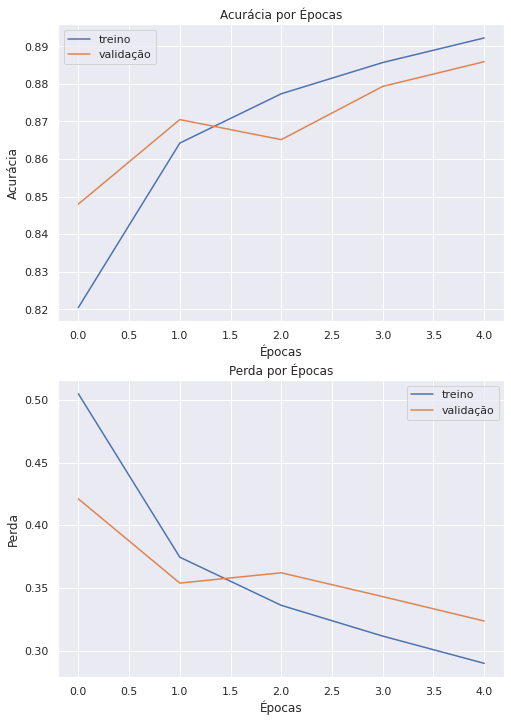

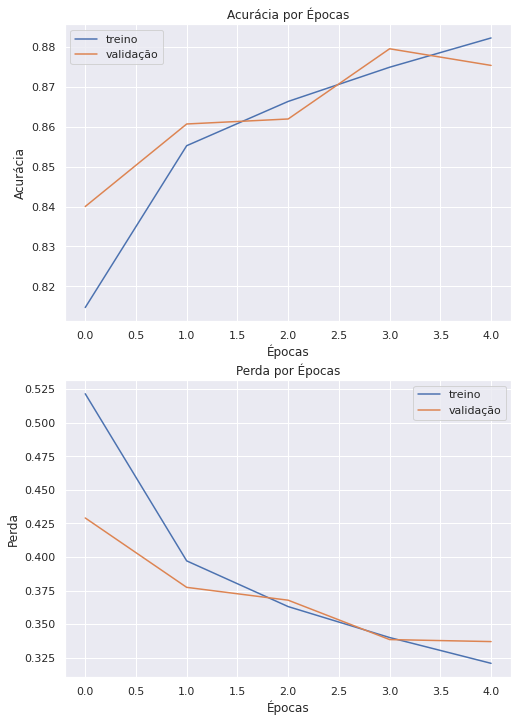

In [16]:
show_history(historico_sem_droput.history)
show_history(historico.history)


In [17]:
testes = modelo.predict(imagens_teste)

In [18]:
elemento = 1
print(f'resultado teste {np.argmax(testes[elemento])}')
print(f'número da imagem de teste {identificacoes_teste[elemento]}')

resultado teste 2
número da imagem de teste 2


In [19]:
perda_teste, acuracia_teste = modelo.evaluate(imagens_teste, identificacoes_teste)
print(f'perda do teste: {perda_teste}')
print(f'acuracia do teste: {acuracia_teste}')

313/313 [==============================] - 1s 2ms/step - loss: 46.5464 - accuracy: 0.8652
perda do teste: 46.54641342163086
acuracia do teste: 0.8651999831199646


### Sumário Modelo

In [24]:
sumario_modelo = modelo.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 256)               200960    
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________


### Pesos Camada Dense

In [28]:
pesos_camada_dense = modelo.layers[1].get_weights()

### Salvando e usando o modelo pronto

In [20]:
modelo.save('modelo.h5')

In [21]:
from tensorflow.keras.models import load_model
modelo_salvo = load_model('modelo.h5')

In [22]:
testes_modelo_salvo = modelo_salvo.predict(imagens_teste)
print(f'resultado teste modelo salvo {np.argmax(testes[elemento])}')
print(f'número da imagem de teste do modelo salvo {identificacoes_teste[elemento]}')

resultado teste modelo salvo 2
número da imagem de teste do modelo salvo 2


In [23]:
teste = 'deep learning collab github'
print(teste)

deep learning collab github
